In [1]:
import ROOT
from ROOT import TFile
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import pandas as pd 
import time
import uproot
import uproot3
import R2h_module as r2h
import root_pandas as rpd
from root_pandas import read_root
from matplotlib import rc
import seaborn as sns
#import cupy as cp, math, pylab
import os, os.path
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 13}) 
mpl.rcParams.update({'ytick.labelsize': 13}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'

Welcome to JupyROOT 6.22/09


In [1]:
#import jupyterthemes as jt
#from jupyterthemes.stylefx import set_nb_theme
#set_nb_theme('chesterish')

# Loading libraries

In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

#import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

#import mplhep as hep
#hep.style.use("CMS")

<module 'R2h_module' from '/home/seba/2d_Correlations/R2h_module.py'>

# Getting the data

In [4]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [5]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C
Get trigger dataframes from deuterium target C
Getting dataframes from target Fe
Get trigger dataframes from deuterium target Fe
Getting dataframes from target Pb
Get trigger dataframes from deuterium target Pb
CPU times: user 4.36 s, sys: 437 ms, total: 4.8 s
Wall time: 4.79 s


# Getting GIBUU

In [6]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="/home/sebouh/di-hadron/"
for target in ['D','C','Fe','Pb']:
    for suffix in "", "_tweak", "_tweak2","_tweak_harut":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger
 pairs
D_tweak
 trigger
 pairs
D_tweak2
 trigger
 pairs
D_tweak_harut
 trigger
 pairs
C
 trigger
 pairs
C_tweak
 trigger
 pairs
C_tweak2
 trigger
 pairs
C_tweak_harut
 trigger
 pairs
Fe
 trigger
 pairs
Fe_tweak
 trigger
 pairs
Fe_tweak2
 trigger
 pairs
Fe_tweak_harut
 trigger
 pairs
Pb
 trigger
 pairs
Pb_tweak
 trigger
 pairs
Pb_tweak2
 trigger
 pairs
Pb_tweak_harut
 trigger
 pairs
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [7]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

mixtag='xQ2_'
#mixtag='angle_cut_15deg_'
dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C Fe Pb".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [8]:
for dct in dfs_mixed,dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C'.split()])

dict_keys(['D_C', 'C', 'Fe', 'Pb'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [9]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591
Q2>1.0 and Q2<4.0 131591  (100.00  %)
0.2<h1_p<5.0  131585  (100.00  %)
inelasticity < 0.85 131585  (100.00  %)
h1_pid = pions (trigger) 131585  (100.00  %)
2.2 < nu <4.2 129258  (98.23  %)
10< h1_th 129258  (100.00  %)
Theta/P fiducial region selected for trigger hadron 129258  (100.00  %)
Nom cuts for the trigger applied 44785  (34.65  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 44785  (100.00  %)
2.2 < nu < 4.2 44785  (100.00  %)
secondary hadrons are pions 44785  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 35717  (79.75  %)
kinematic limits for h2_z 35636  (99.77  %)
kinematic limits for dphi 35596  (99.89  %)
kinematic limits for pair_mass 35415  (99.49  %)
leading hadrons are pions 35415  (100.00  %)
0.2<h2_p<5.0 35415  (100.00  %)
0.2<h1_p<5.0 35415  (100.00  %)
10<h2_th 35415  (100.00  %)
Theta/P fiducial region selected for secondary hadron 32420  (91.54  %)
10< h1_th 32420  (100.00  %)
Theta/P fiducial region

2.2 < nu <4.2 2306882  (95.91  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2306882  (100.00  %)
2.2 < nu < 4.2 2306882  (100.00  %)
secondary hadrons are pions 1392583  (60.37  %)
(h1_pid*h2_pid)<0, opposite charge pions 1331857  (95.64  %)
kinematic limits for h2_z 1280597  (96.15  %)
kinematic limits for dphi 1279264  (99.90  %)
kinematic limits for pair_mass 1275717  (99.72  %)
leading hadrons are pions 1275717  (100.00  %)
0.2<h2_p<5.0 1164507  (91.28  %)
0.2<h1_p<5.0 1164507  (100.00  %)

key:  GiBUU_D_tweak_harut
Entries before cut  2348393
Q2>1.0 and Q2<4.0 2347490  (99.96  %)
0.2<h1_p<5.0  2347490  (100.00  %)
inelasticity < 0.85 2347490  (100.00  %)
h1_pid = pions (trigger) 2347490  (100.00  %)
2.2 < nu <4.2 2254015  (96.02  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 2254015  (100.00  %)
2.2 < nu < 4.2 2254015  (100.00  %)
secondary hadrons are pions 1328454  (58.94  %)
(h1_pid*h2_pid)<0, opposite charge pions 1282421  (96.53  %)
kine

inelasticity < 0.85 511802  (100.00  %)
h1_pid = pions (trigger) 511802  (100.00  %)
2.2 < nu <4.2 490225  (95.78  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 490225  (100.00  %)
2.2 < nu < 4.2 490225  (100.00  %)
secondary hadrons are pions 275663  (56.23  %)
(h1_pid*h2_pid)<0, opposite charge pions 246891  (89.56  %)
kinematic limits for h2_z 230266  (93.27  %)
kinematic limits for dphi 230079  (99.92  %)
kinematic limits for pair_mass 229055  (99.55  %)
leading hadrons are pions 229055  (100.00  %)
0.2<h2_p<5.0 192716  (84.14  %)
0.2<h1_p<5.0 192716  (100.00  %)

key:  GiBUU_Pb_tweak_harut
Entries before cut  1204097
Q2>1.0 and Q2<4.0 1203510  (99.95  %)
0.2<h1_p<5.0  1203510  (100.00  %)
inelasticity < 0.85 1203510  (100.00  %)
h1_pid = pions (trigger) 1203510  (100.00  %)
2.2 < nu <4.2 1153189  (95.82  %)
Starting election on dipion variables
This is MC
1.0< Q2 <4.0 1153189  (100.00  %)
2.2 < nu < 4.2 1153189  (100.00  %)
secondary hadrons are pions 633769  (5

In [10]:
print(dfs_pair.keys())

dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut', 'D'])


In [11]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
Q2>1.0 and Q2<4.0 652690  (100.00  %)
0.2<h1_p<5.0  652674  (100.00  %)
inelasticity < 0.85 652674  (100.00  %)
h1_pid = pions (trigger) 652674  (100.00  %)
2.2 < nu <4.2 642836  (98.49  %)
10< h1_th 642836  (100.00  %)
Theta/P fiducial region selected for trigger hadron 642836  (100.00  %)
Nom cuts for the trigger applied 291788  (45.39  %)
 
D_C False
Entries before cut  875478
Q2>1.0 and Q2<4.0 875478  (100.00  %)
0.2<h1_p<5.0  875467  (100.00  %)
inelasticity < 0.85 875467  (100.00  %)
h1_pid = pions (trigger) 875467  (100.00  %)
2.2 < nu <4.2 863117  (98.59  %)
10< h1_th 863117  (100.00  %)
Theta/P fiducial region selected for trigger hadron 863117  (100.00  %)
Nom cuts for the trigger applied 405810  (47.02  %)
 
Fe False
Entries before cut  370123
Q2>1.0 and Q2<4.0 370122  (100.00  %)
0.2<h1_p<5.0  370122  (100.00  %)
inelasticity < 0.85 370122  (100.00  %)
h1_pid = pions (trigger) 370122  (100.00  %)
2.2 < nu <4.2 370122  (100.00  %)
10< h1_th

In [12]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mixed.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
    print(f"\n\n{key}")
    if  'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
    dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
    dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

    mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
    dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



D_C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 3403326  (100.00  %)
2.2 < nu < 4.2 3361656  (98.78  %)
secondary hadrons are pions 2449421  (72.86  %)
(h1_pid*h2_pid)<0, opposite charge pions 930584  (37.99  %)
kinematic limits for h2_z 899056  (96.61  %)
kinematic limits for dphi 898616  (99.95  %)
kinematic limits for pair_mass 890515  (99.10  %)
leading hadrons are pions 890515  (100.00  %)
0.2<h2_p<5.0 890515  (100.00  %)
0.2<h1_p<5.0 890515  (100.00  %)
pt>0.07071067811865475 GeV 866977  (97.36  %)
10<h2_th 866977  (100.00  %)
Theta/P fiducial region selected for secondary hadron 816153  (94.14  %)
10< h1_th 816153  (100.00  %)
Theta/P fiducial region selected for trigger hadron 816153  (100.00  %)
Nom cuts for the pair applied (pi pi) 339912  (41.65  %)


C
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2509591  (100.00  %)
2.2 < nu < 4.2 2476511  (98.68  %)
secondary hadrons are pions 1581622  (63.86  %)
(h1_pid*h2_pid)<0, opposite charge 

In [13]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [14]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"  ## this is ThetaLab(0) for the electron!
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'## this is ThetaVirtLab()
    ## polar angle of the virtual photon wrt the lab frame
    theta_qe=f"{theta_q}+{theta_e}"  ## angle bt scattered electron and virtual photon
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [15]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



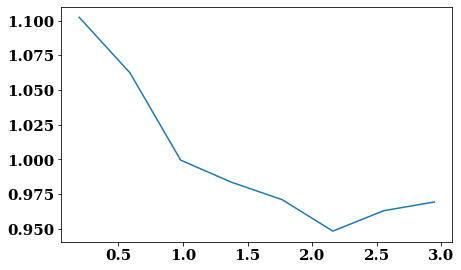

In [16]:
## Alternative way to do the mixing

def mix_corr_alt(df):
    nbins=16
    subbins = 10

    ntotbins=nbins*subbins
    y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
    y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
    x=(x[:-1]+x[1:])/2
    #print(y1)
    ym=[0]*len(y1)
    #print(len(y1), len(ym))
    for i in range(len(y1)):
        for j in range(len(y2)):
            ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
    #ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    
    ym=[sum(ym[i*subbins:(i+1)*subbins])+sum(ym[ntotbins-(i+1)*subbins:ntotbins-i*subbins]) for i in range(nbins)]
    ym/=sum(ym)/len(ym)
    return ym[len(ym)//2:]
pid=211; pT1min=.25; pT2min=.25; pMin=0.35
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
plt.plot(np.linspace(np.pi/16, 15*np.pi/16, 8), mix_corr_alt(dfs_pair["D"].query(q)))

In [17]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, GiBUU_suffix="",
              addCuts=None, addCutsTrig=None, divideByMix=False):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
        else:
            Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            if usePRLcuts:
                q = "h2_z>0.05 and h1_z>0.5"
            N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = f"h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom

            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            M = N2mix/(sum(N2mix)/len(N2mix))
            dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)
            if divideByMix:
                C = S/M
                dCstat = dSstat/M
            else :
                C=S
                dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, M=M, dSstat=dSstat, dMstat=dMstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, M_alt=M_alt))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            integral_GiBUU_D = 0
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):
            
                nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+GiBUU_suffix].query(q)['dphi'], bins=bins)

                x = (x[1:]+x[:-1])/2
                dx =x[1]-x[0]

                qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                N1 = len(dfs_trigger["GiBUU_"+A+GiBUU_suffix].query(qtrig))
                y = N2/N1/dx/2
                dy=y*np.sqrt(1/N2+1/N1)
                
                #print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2

                y/=integral_GiBUU_D
                dy/=integral_GiBUU_D
                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D

                tmp = A + "_fine" if useFinerBinning else A
                GiBUU[k][tmp] = pd.DataFrame(dict(C=y,dCstat=dy, R=y/GiBUU_D,
                                                phi=x, 
                                                 phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [18]:
from scipy.interpolate import make_interp_spline
def make_plots_new(data, GiBUU, sliceinfo, pMin=.350, pT1min=.25, pT2min=.25, filename_tag=None,
                  slice_unit=None, useSpline=False, gibuuStats=True):
    

    #make several figures all at the same time.  
    # C: correlation function (normalized to D)
    # S: same-event yield (no correction for efficiency)
    # M: mixed-event yield
    # Ceff:  correlation function with single-particle efficiency correction
    figs = {}
    axs= {}

    slicevartex = sliceinfo[0].split("<")[1].replace("$","") if len(sliceinfo[0]) != 0 else None
    s=(', '+slicevartex) if slicevartex!=None else ''
    #ylabels = {"C":f"$C(\Delta\phi{s})$",
    ylabels = {"C":f"Correlation",
               "M":f"$M(\Delta\phi{s})$",
               "S":f"$S(\Delta\phi{s})$",
               "R":f"$A/D$ Ratio       "
               #"Ceff":f"$C(\Delta\phi, {slicevartex})$ [eff. corr.]"
              }

    #set up panels in figures
    keys= "SMCR"

    height = 18*len(sliceinfo)/4
    if len(sliceinfo) == 1:
        height = 7
    width = 14 
    
    # one figure with the S and M plots (for the supplementary)
    # the other is the C and R plots
    if len(sliceinfo) == 1:
        figs["SM"], (axs["S"],axs["M"]) = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        figs["CR"], (axs["C"],axs["R"]) = plt.subplots(2,1, 
               figsize=(8,7*1.25),sharey='row', sharex='all', 
                                                       gridspec_kw=dict(height_ratios=(10,2.5)))   
        for key in keys:
            axs[key] = [axs[key]]
    else:
        figs["SM"], ax = plt.subplots(len(sliceinfo), 2, 
               figsize=(width,height),sharey='col', sharex='all')
        axs["S"] = [ax[k][0] for k in range(len(ax))]
        axs["M"] = [ax[k][1] for k in range(len(ax))]
        figs["CR"], ax = plt.subplots(2,len(sliceinfo), 
               figsize=(16,7*1.25), sharex='all', sharey='none',
                                     gridspec_kw=dict(height_ratios=[10,2.5]))   
        axs["C"] = [ax[0][k] for k in range(len(sliceinfo))]
        axs["R"] = [ax[1][k] for k in range(len(sliceinfo))]
    
    artists = []
    maxC=0.05
    maxR=0.05
    fontsize=18
    for ax in axs['C']+axs['R']:
        ax.tick_params(axis='both', labelsize=fontsize)
    for k in range(len(sliceinfo)):
        
        for key in "CRSM":    
            if (key in "SM" and k == len(sliceinfo)-1) or key == "R":
                axs[key][k].set_xlabel("$\\Delta\phi$ [rad]", fontsize=fontsize)
            axs[key][k].set_ylabel(ylabels[key], fontsize=fontsize)
        linestyles='- -- : -. --'.split()
        colors='tab:red tab:blue tab:orange tab:green k'.split()
        markers='*vos*'
        
        Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            
            #which_set=A
            x= data[k][A].phi
            shift = 0.1*(x[1]-x[0])*(i-1.5)
            
            S = data[k][A].S
            M = data[k][A].M
            C = data[k][A].C
            R_data = data[k][A].R
            dSstat = data[k][A].dSstat
            dMstat = data[k][A].dMstat
            dCstat = data[k][A].dCstat
            dCsyst = data[k][A].dCsyst
            dRstat = data[k][A].dRstat
            
            arg = dict(color=colors[i], marker=markers[i], linestyle='',
                      capsize=3)

            axs['S'][k].errorbar(x+shift, S,dSstat, **arg, label=A)
            axs['S'][k].errorbar(2*np.pi-x+shift, S, dSstat, **arg)

            axs['M'][k].errorbar(x+shift, M,dMstat, **arg, label=A)
            axs['M'][k].errorbar(2*np.pi-x+shift, M, dMstat, **arg)



            artists.append(axs['C'][k].errorbar(x+shift, C,dCstat, **arg, label=A))
            axs['C'][k].errorbar(2*np.pi-x+shift, C, dCstat, **arg)
            arg['capsize']=0
            dCtot = np.hypot(dCstat, dCsyst)
            axs['C'][k].errorbar(x+shift,C, dCtot, **arg)
            axs['C'][k].errorbar(2*np.pi-x+shift,C,dCtot, **arg)
            if A!="D":
                axs['R'][k].errorbar(x+shift,R_data, 
                                    dRstat,
                                    **arg)
                axs['R'][k].errorbar(2*np.pi-x+shift,R_data, 
                                    dRstat,
                                    **arg)
        Alist = enumerate("D C Fe Pb".split())
        #granulatir
        for i, A in Alist:
            #y = GiBUU[k][A+"_fine"].C
            y=GiBUU[k][A].C
            dy=GiBUU[k][A].dCstat
            if not gibuuStats:
                arg = dict(color=colors[i], marker=None, linestyle=linestyles[i])
            else:
                arg = dict(color=colors[i], alpha=0.4)
            
            #x= GiBUU[k][A+"_fine"].phi
            x=GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            y = list(y)+ list(reversed(list(y)))
            dy = list(dy)+ list(reversed(list(dy)))
            X_Y_Spline = make_interp_spline(x, y)
            
            print(f"GiBUU relative stat error {max(np.array(dy)/y):.5f}")
            
            # Returns evenly spaced numbers
            # over a specified interval.
            X_ = np.linspace(x.min(), x.max(), 500)
            Y_ = X_Y_Spline(X_)
            
            X_=[0] + list(X_)+[2*np.pi]
            Y_=[Y_[0]] + list(Y_)+[Y_[0]]
            
            if useSpline:
                artists.append(axs['C'][k].plot(X_, Y_, **arg, label=f"GiBUU {A}")[0])
            else :
                if not gibuuStats:
                    artists.append(axs['C'][k].plot(x, y, **arg, label=f"GiBUU {A}")[0])
                else:
                    artists.append(axs['C'][k].fill_between(x, np.array(y)-np.array(dy),
                                                           np.array(y)+np.array(dy) , 
                                                            **arg, label=f"GiBUU {A}"))
            
            x= GiBUU[k][A].phi
            x= pd.Series(list(x)+list(2*np.pi-pd.Series(reversed(x))))
            R_GiBUU = GiBUU[k][A].R
            
            if A!="D":
                axs['R'][k].plot(x, list(R_GiBUU)+list(reversed(R_GiBUU)), **arg, label=f"GiBUU {A}")

            if (max(C)>maxC):
                maxC=max(C)
            if max(y)>maxC:
                maxC = max(y)
            if max(R_data)>maxR:
                maxR = max(R_data)
            if max(R_GiBUU)>maxR:
                maxR = max(R_GiBUU)

            axs["C"][k].set_ylim(0, maxC*(1.1 if len(sliceinfo) == 1 else 1.4))
            axs["R"][k].set_ylim(0, 1.3*maxR)
        for key in keys:
            cuts_txt="$1<Q^2<4$ GeV$^2$\n"+\
                      "$2.3<\\nu<4.2$ GeV\n"+\
                      "$z_1>0.5$\n"+\
                      ("$p^T>250$ MeV\n")
            #if key == "R" and len(sliceinfo)==1:
            #    axs[key][k].text(0.4,0.6 , cuts_txt,
            #                    transform=axs[key][k].transAxes)
            if key == "C" and len(sliceinfo)==1:
                axs[key][k].text(0.05,0.42, cuts_txt,
                                transform=axs[key][k].transAxes,
                                horizontalalignment='left', fontsize=fontsize)
            elif key == "C" and k==2 and len(sliceinfo)!=1:
                axs[key][k].text(0.07,0.65, cuts_txt,
                                transform=axs[key][k].transAxes, fontsize=fontsize)

            #else :
            #    axs[key][k][j].text(0.05,0.1, cuts_txt
            #                transform=axs[key][k][j].transAxes)
            if len(sliceinfo)!=1 and key in "SM":    
                axs[key][k].text(0.5,0.9,
                               sliceinfo[k],
                              transform=axs[key][k].transAxes,
                                 horizontalalignment='center',
                                 fontsize=fontsize)
            elif len(sliceinfo)!=1 and key == "C": 
                axs[key][k].set_title(sliceinfo[k] + \
                                      ((" "+slice_unit) if slice_unit is not None else ""),
                                 fontsize=fontsize)
            if k ==0: 
                if key == "C":
                    a=artists
                    l=[aa.get_label() for aa in a]
                    #split legend, with data on one side and GiBUU on the other
                    plt.sca(axs[key][(k+1) if len(sliceinfo)!=1 else k])
                    legend2 = plt.legend(a[4:], l[4:], framealpha=0,
                                loc='upper left' if len(sliceinfo)!=1 else "upper right",
                                         ncol=1 if len(sliceinfo) != 3 else 2, 
                                         fontsize=fontsize, 
                                         columnspacing=0.8)
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1 if len(sliceinfo) != 3 else 2, fontsize=fontsize)
                    axs[key][(k+1) if len(sliceinfo)!=1 else k].add_artist(legend2)
                elif key == "S": 
                    #a=[artists[i] for i in [0,2,4,6]]
                    a=[artists[i] for i in [0,1,2,3]]
                    l=[aa.get_label() for aa in a]
                    axs[key][k].legend(a[:4], l[:4], framealpha=0,
                                       loc='upper left',ncol=1)
            
            axs[key][k].set_xlim(0,2*np.pi)
    for ax in axs['R']:
        ax.axhline(1, color='0.5', alpha=0.7, linestyle=':')
    for key in "CR SM".split():
        #fig.suptitle(suptitle)
        figs[key].tight_layout()
        #if len(sliceinfo)==1:
        figs['CR'].subplots_adjust(hspace=0) 
        #figs['CR'].subplots_adjust(wspace=0)
        #if filename_tag is not None:
        #    figs[key].savefig(f"images/{key}_{filename_tag}.pdf")
        #    figs[key].savefig(f"images/{key}_{filename_tag}.png")
        figs[key].show()
    for d in ("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/results/main/",
                "/home/sebouh/Documents/Overleaf_git/CorrPaper/figures/"):
        figs["CR"].tight_layout()
        figs["CR"].savefig(f"{d}/corr_{filename_tag}.pdf")

In [19]:
import copy
def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)
 
    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    
    newIntegral =2*dx*sum(yDcorr)
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    return data_corr

In [20]:
import pickle

with open('syst_from_misid.pkl', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    syst_from_misid = pickle.load(f)
def add_syst_error_from_misid(data, key):
    for i in range(len(data)):
        for A in "D C Fe Pb".split():
            data[i][A]['dCsyst_pid']=syst_from_misid[key][i]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_pid'])

In [21]:
def add_syst_error_from_coulomb(data, key):
    if "pT" not in key:
        return
    syst_from_coulomb={"C":0.014, "Fe": 0.030, "Pb": 0.081}
    for i in range(len(data)):
        for A in "C Fe Pb".split():
            data[i][A]['dCsyst_coul']=syst_from_coulomb[A]*data[i][A].C
            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_coul'])

In [22]:
#import pickle

#with open('syst_from_cuts.pkl', 'rb') as f:
    ## The protocol version used is detected automatically, so we do not
    ## have to specify it.
    #syst_from_cuts = pickle.load(f)
#def add_syst_error_from_cuts(data, key):
#    for i in range(len(data)):
#        for A in "D C Fe Pb".split():
#            data[i][A]['dCsyst_cuts']=syst_from_cuts[key][i].tot*data[i][A].C

#            data[i][A].dCsyst =  np.hypot(data[i][A].dCsyst,data[i][A]['dCsyst_cuts'])

In [23]:
dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "C Fe Pb".split()}
dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")
#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [24]:
dfs_pair_MC = {"MC_" + A: R2h_module.applyCuts(dfs_mc[A],nomCuts=True) for A in "D C Fe Pb".split()}

Entries before cut  508232
Q2>1.0 and Q2<4.0 508232  (100.00  %)
0.2<h1_p<5.0  508232  (100.00  %)
inelasticity < 0.85 508232  (100.00  %)
h1_pid = pions (trigger) 508232  (100.00  %)
2.2 < nu <4.2 508232  (100.00  %)
10< h1_th 508232  (100.00  %)
Theta/P fiducial region selected for trigger hadron 508232  (100.00  %)
Nom cuts for the trigger applied 243989  (48.01  %)
Entries before cut  482681
Q2>1.0 and Q2<4.0 482681  (100.00  %)
0.2<h1_p<5.0  482681  (100.00  %)
inelasticity < 0.85 482681  (100.00  %)
h1_pid = pions (trigger) 482681  (100.00  %)
2.2 < nu <4.2 482681  (100.00  %)
10< h1_th 482681  (100.00  %)
Theta/P fiducial region selected for trigger hadron 482681  (100.00  %)
Nom cuts for the trigger applied 233985  (48.48  %)
Entries before cut  208328
Q2>1.0 and Q2<4.0 208328  (100.00  %)
0.2<h1_p<5.0  208328  (100.00  %)
inelasticity < 0.85 208328  (100.00  %)
h1_pid = pions (trigger) 208328  (100.00  %)
2.2 < nu <4.2 208328  (100.00  %)
10< h1_th 208328  (100.00  %)
Theta/P 

In [25]:
for c in dfs_pair_MC['MC_D'].columns:
    #if "h1_" in c:
    print(c)

dphi
dphi_lab
drap
h1_z
h2_z
h1_cm_pt
h2_cm_pt
h1_xf
h2_xf
h1_rap
ycm
h2_rap
h1_pid
h2_pid
h1_cm_ph
h2_cm_ph
h1_cm_th
h2_cm_th
pair_mass
pair_pt
mx_eh1h2x
mx_eh1x
mx_eh2x
t
Q2
nu
W
e_px
e_py
e_pz
e_p
e_ph
e_th
SampFracEl25
SampFracEl20
TargTypeSM
TargType
x
u
h1_ph
h1_th
h2_ph
h2_th
h1_deltaZ
h2_deltaZ
h1_Nphe
h2_Nphe
h1_Sector
h2_Sector
h1_FidCut
h2_FidCut
h1_FidCutPiPlus
h2_FidCutPiPlus
h1_Chi2CC
h2_Chi2CC
h1_StatCC
h2_StatCC
h1_Betta
h2_Betta
h1_T4
h2_T4
evnt
pass_recon
dphi_truth
dphi_lab_truth
drap_truth
h1_truth_z
h2_truth_z
h1_truth_cm_pt
h2_truth_cm_pt
h1_truth_xf
h2_truth_xf
h1_truth_rap
ycm_truth
h2_truth_rap
h1_truth_pid
h2_truth_pid
h1_truth_cm_ph
h2_truth_cm_ph
h1_truth_cm_th
h2_truth_cm_th
pair_mass_truth
pair_pt_truth
mx_eh1h2x_truth
mx_eh1x_truth
mx_eh2x_truth
t_truth
Q2_truth
nu_truth
W_truth
x_truth
u_truth
h1_truth_ph
h1_truth_th
h2_truth_ph
h2_truth_th
e_truth_px
e_truth_py
e_truth_pz
e_truth_p
e_truth_ph
e_truth_th
inelasticity
diff_phi_cm
pi
h1_e
h2_e
h2_mass
h1_p

# Making plots comparison data/rec/truth

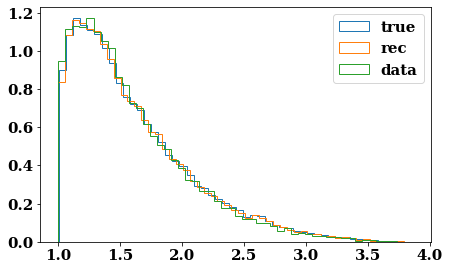

In [26]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

rec   = dfs_pair_MC['MC_D'].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)
truth = dfs_pair_MC['MC_D'].query("h1_truth_pid==211 and h2_truth_pid ==-211" + " and "+ othercuts)
data  = dfs_pair['D_C'].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)


#print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("Q2")

plt.hist(truth.eval("Q2_truth"), bins=50, density=True, histtype='step', label='true')
plt.hist(rec.eval("Q2"), bins=50, density=True, histtype='step', label='rec')
plt.hist(data.eval("Q2"), bins=50, density=True, histtype='step', label='data')
plt.legend()
plt.show()

#for var in testvars:
    
#    plt.hist(rec.eval(var), bins=50, density=True, histtype='step')
#    plt.hist(truth.eval(var), bins=50, density=True, histtype='step')
#    plt.show()

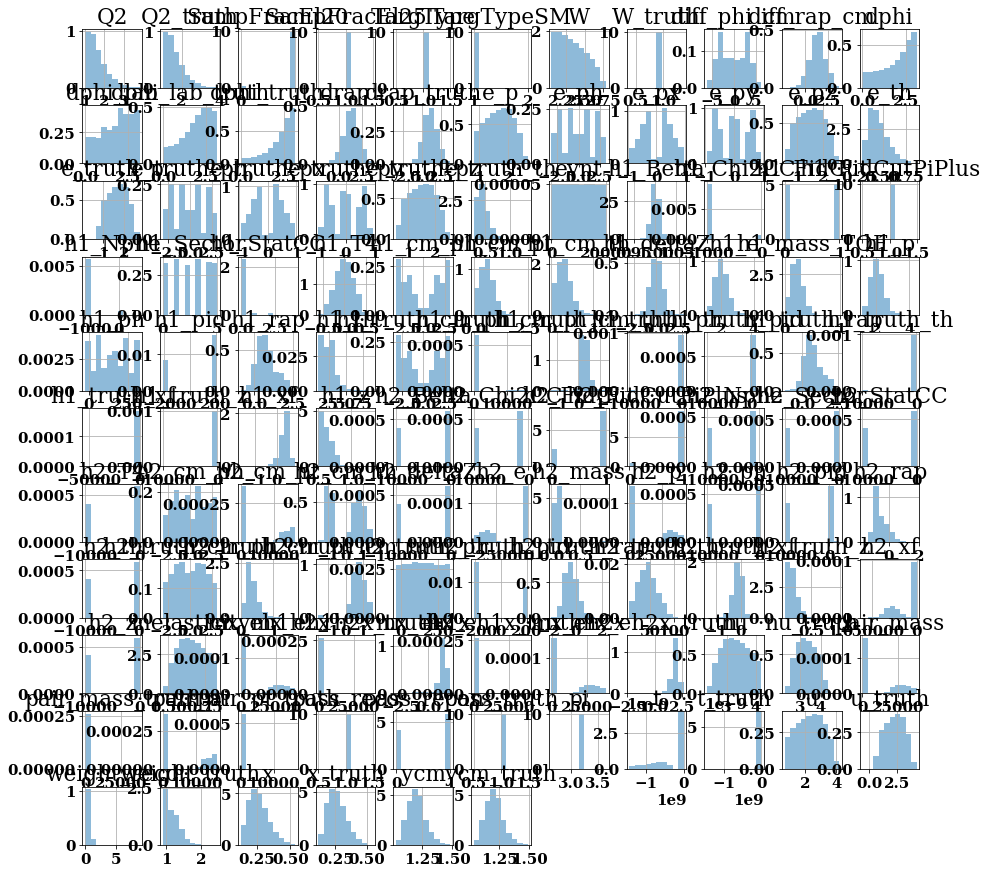

In [27]:
dfs_pair_MC['MC_D'].hist(figsize=(15, 15),density=True,alpha=0.5,bins=10)
plt.show()

NameError: name 'h1_cm_pt_truth' is not defined

In [29]:
for key in dfs_pair_MC.keys():

    dfs_pair_MC[key].rename(columns={'h1_truth_cm_pt':'h1_cm_pt_truth'}, inplace=True)
    dfs_pair_MC[key].rename(columns={'h2_truth_cm_pt':'h2_cm_pt_truth'}, inplace=True)
    dfs_pair_MC[key].rename(columns={'h1_truth_z':'h1_z_truth'}, inplace=True)
    dfs_pair_MC[key].rename(columns={'h2_truth_z':'h2_z_truth'}, inplace=True)
    dfs_pair_MC[key].rename(columns={'h1_truth_ph':'h1_ph_truth'}, inplace=True)
    dfs_pair_MC[key].rename(columns={'h2_truth_ph':'h2_ph_truth'}, inplace=True)


In [30]:
for key in dfs_pair_MC.keys():
    print(key)

MC_D
MC_C
MC_Fe
MC_Pb


 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_Q2_D2}


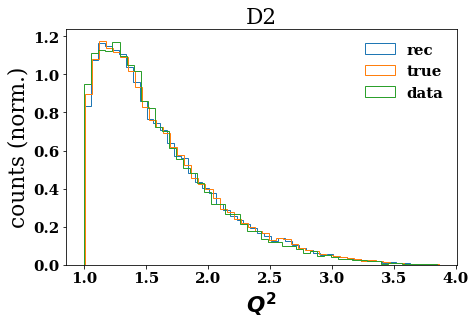

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_x_D2}


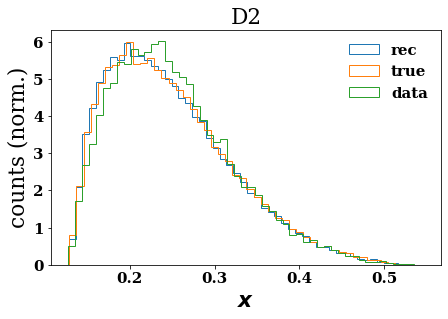

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_dphi_D2}


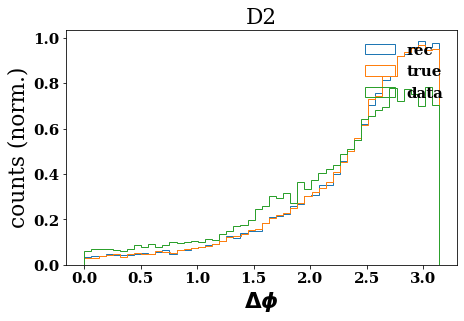

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_drap_D2}


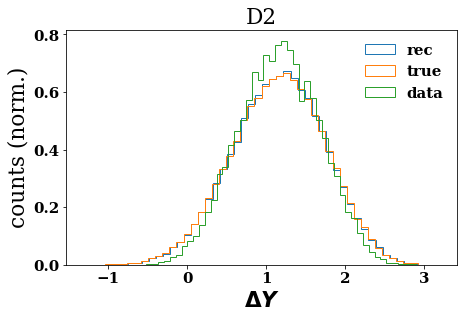

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h1_cm_pt_D2}


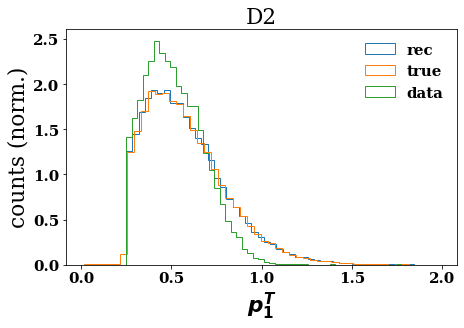

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h2_cm_pt_D2}


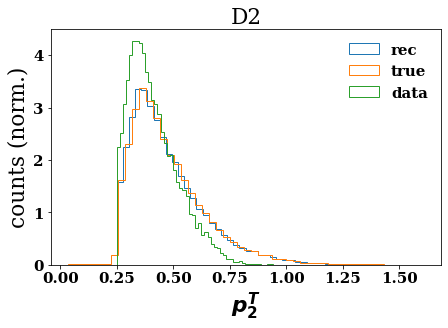

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h1_z_D2}


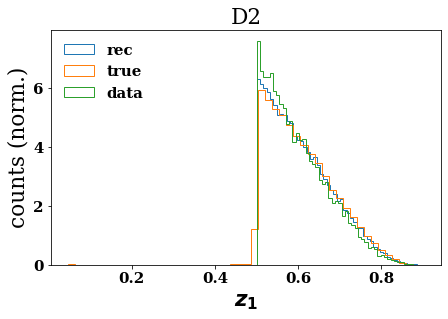

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h2_z_D2}


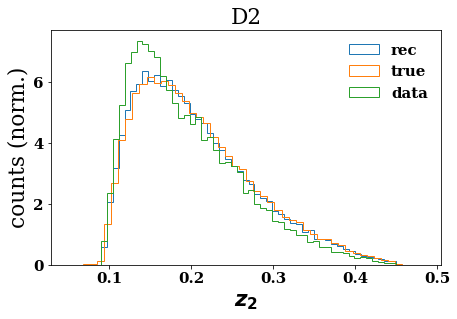

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h1_ph_D2}


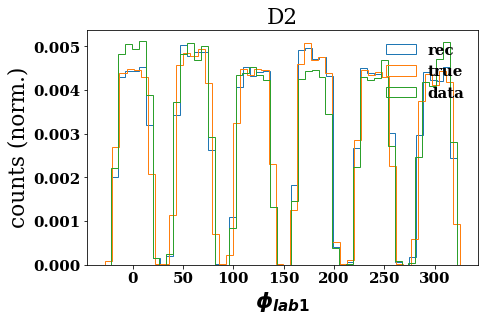

 \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_h2_ph_D2}


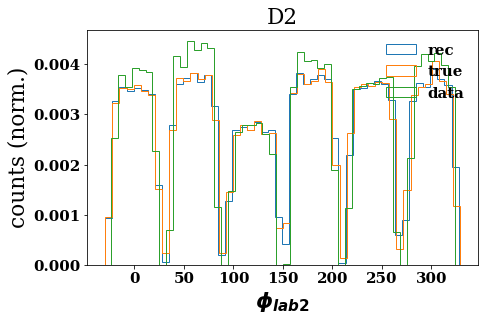

In [39]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"

rec   = dfs_pair_MC['MC_D'].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)
truth = dfs_pair_MC['MC_D'].query("h1_truth_pid==211 and h2_truth_pid ==-211" + " and "+ othercuts)
data  = dfs_pair['D_C'].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)


#print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("Q2")
#testvars.append("nu")
testvars.append("x")
testvars.append("dphi")
testvars.append("drap")
testvars.append("h1_cm_pt")
testvars.append("h2_cm_pt")
testvars.append("h1_z")
testvars.append("h2_z")
testvars.append("h1_ph")
testvars.append("h2_ph")

for var in testvars:
    
    plt.hist(rec.eval(var), bins=50, weights=rec['weight_truth'], density=True, histtype='step', label='rec')
    plt.hist(truth.eval(var+'_truth'), weights=truth['weight_truth'], bins=50, density=True, histtype='step', label='true')
    plt.hist(data.eval(var), bins=50, density=True, histtype='step', label='data')
    plt.legend(loc='best',frameon=False)
    outputname="/home/seba/2d_Correlations/comparison_MC_data_"+var+"_D2.pdf"
    print(" \includegraphics[scale=0.4]{figures/MC_comp/comparison_MC_data_"+var+"_D2}")
    if var=='dphi':
        var='$\Delta\phi$'
    if var=='drap':
        var='$\Delta Y$'  
    if var=='h1_cm_pt':
        var='$p^T_{1}$'
    if var=='h2_cm_pt':
        var='$p^T_{2}$'
    if var=='h1_z':
        var='$z_{1}$'
    if var=='h2_z':
        var='$z_{2}$'
    if var=='Q2':
        var='$Q^{2}$'        
    if var=='nu':
        var=r'$\nu$'         
    if var=='x':
        var=r'$x$' 
    if var=='h1_ph':
        var=r'$\phi_{lab 1}$' 
    if var=='h2_ph':
        var=r'$\phi_{lab 2}$'         
        
    plt.xlabel(var)
    plt.ylabel('counts (norm.)')
    plt.title('D2')
    plt.savefig(outputname)
    plt.show()

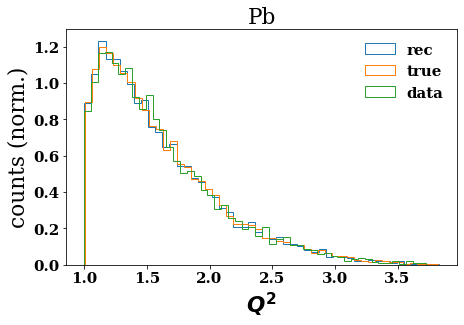

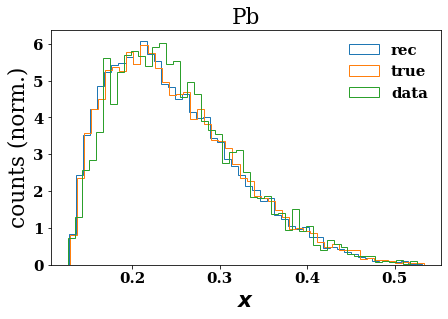

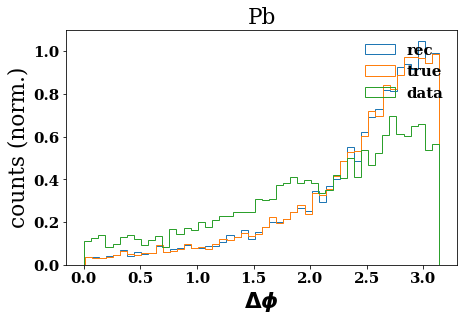

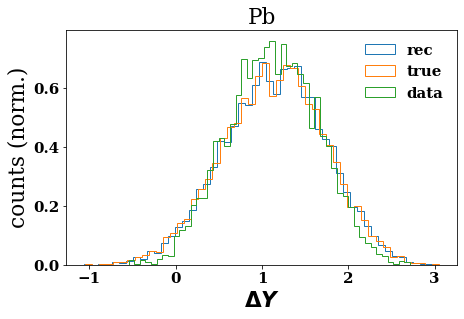

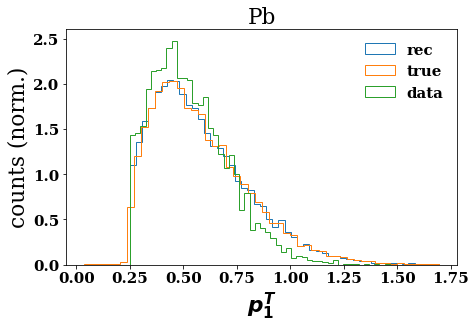

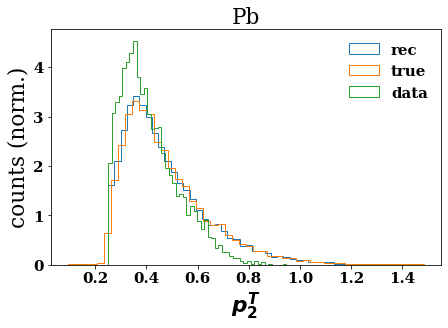

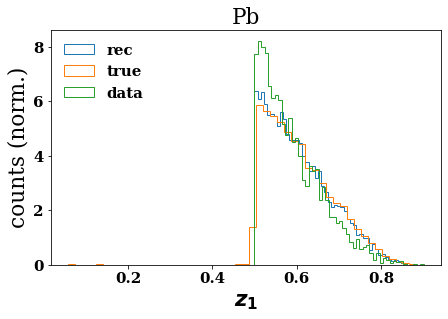

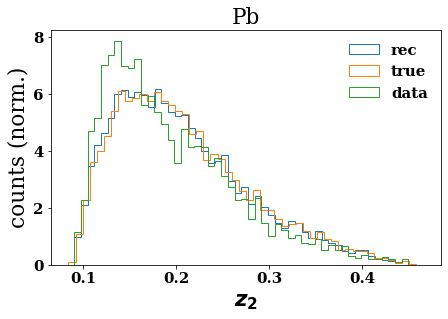

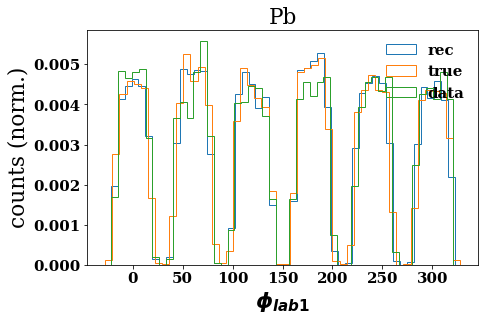

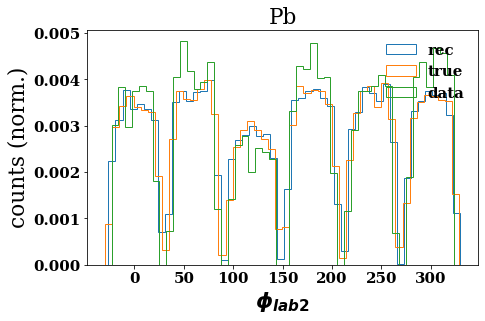

In [40]:
othercuts = "h1_cm_pt>0.25 and h2_cm_pt>0.25 and h2_p>0.35"
othercuts += " and (h1_p+h2_p)<nu and h1_z>0.5 and h2_z>0.05 and h2_z<0.45"
#othercuts += " and drap<1 and dphi< 1"
target='Pb'

rec   = dfs_pair_MC['MC_'+target].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)
truth = dfs_pair_MC['MC_'+target].query("h1_truth_pid==211 and h2_truth_pid ==-211" + " and "+ othercuts)
data  = dfs_pair[target].query("h1_pid==211 and h2_pid ==-211" + " and "+ othercuts)


#print(len(pass_), len(fail))

#pass_ = pass_[:500]
#plt.scatter(pass_.h1_p, pass_.h1_th,3)
#plt.scatter(fail.h1_p, fail.h1_th,3)
#print(pass_.eval("e_th"))
testvars = []
#testvars.append("h1_cm_pt/sqrt(Q2)")
#testvars.append("(sqrt(h1_p**2+.938**2)+h2_p)/nu")
#testvars.append("sqrt(h1_p**2-h1_cm_pt**2)/sqrt(Q2+nu**2)")

#testvars.append("(h1_e*nu-sqrt(h1_p**2-h1_cm_pt**2)*sqrt(Q2+nu**2))/Q2")
testvars.append("Q2")
#testvars.append("nu")
testvars.append("x")
testvars.append("dphi")
testvars.append("drap")
testvars.append("h1_cm_pt")
testvars.append("h2_cm_pt")
testvars.append("h1_z")
testvars.append("h2_z")
testvars.append("h1_ph")
testvars.append("h2_ph")

for var in testvars:
    
    plt.hist(rec.eval(var), bins=50,weights=rec['weight_truth'],  density=True, histtype='step', label='rec')
    plt.hist(truth.eval(var+'_truth'), weights=truth['weight_truth'], bins=50, density=True, histtype='step', label='true')
    plt.hist(data.eval(var), bins=50, density=True, histtype='step', label='data')
    plt.legend(loc='best',frameon=False)
    outputname="/home/seba/2d_Correlations/comparison_MC_data_"+var+"_Pb.pdf"
    if var=='dphi':
        var='$\Delta\phi$'
    if var=='drap':
        var='$\Delta Y$'  
    if var=='h1_cm_pt':
        var='$p^T_{1}$'
    if var=='h2_cm_pt':
        var='$p^T_{2}$'
    if var=='h1_z':
        var='$z_{1}$'
    if var=='h2_z':
        var='$z_{2}$'
    if var=='Q2':
        var='$Q^{2}$'        
    if var=='nu':
        var=r'$\nu$'         
    if var=='x':
        var=r'$x$' 
    if var=='h1_ph':
        var=r'$\phi_{lab 1}$' 
    if var=='h2_ph':
        var=r'$\phi_{lab 2}$'        
                
    plt.xlabel(var)
    plt.ylabel('counts (norm.)')
    plt.title(target)
    plt.savefig(outputname)
    plt.show()
                